In [3]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
plt.style.use('ggplot')

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
wine['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

<Axes: >

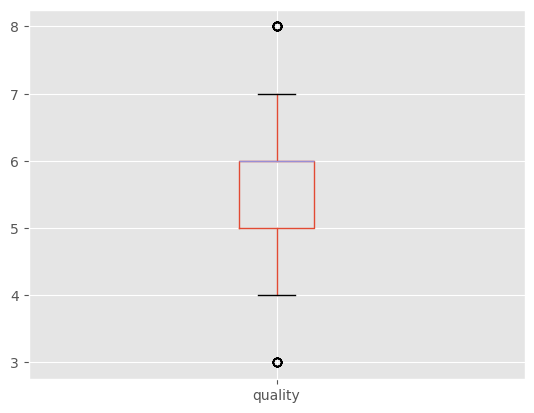

In [9]:
wine.boxplot('quality')

In [10]:
wine.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
for x in wine.columns:
    print(wine[[x,'quality']].corr())
    print()

               fixed acidity   quality
fixed acidity       1.000000  0.124052
quality             0.124052  1.000000

                  volatile acidity   quality
volatile acidity          1.000000 -0.390558
quality                  -0.390558  1.000000

             citric acid   quality
citric acid     1.000000  0.226373
quality         0.226373  1.000000

                residual sugar   quality
residual sugar        1.000000  0.013732
quality               0.013732  1.000000

           chlorides   quality
chlorides   1.000000 -0.128907
quality    -0.128907  1.000000

                     free sulfur dioxide   quality
free sulfur dioxide             1.000000 -0.050656
quality                        -0.050656  1.000000

                      total sulfur dioxide  quality
total sulfur dioxide                1.0000  -0.1851
quality                            -0.1851   1.0000

          density   quality
density  1.000000 -0.174919
quality -0.174919  1.000000

               pH   qualit

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

<Axes: xlabel='quality', ylabel='alcohol'>

In [13]:
plt.hist(wine.alcohol,10,density=False, facecolor='red')

(array([ 37., 515., 323., 257., 232., 119.,  87.,  21.,   7.,   1.]),
 array([ 8.4 ,  9.05,  9.7 , 10.35, 11.  , 11.65, 12.3 , 12.95, 13.6 ,
        14.25, 14.9 ]),
 <BarContainer object of 10 artists>)

In [14]:
x = wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']].copy()

In [15]:
y= wine[['quality']].copy()

In [16]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=455)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1119, 11)
(480, 11)
(1119, 1)
(480, 1)


In [18]:
wine['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [19]:
qualidade_vinho = DecisionTreeClassifier(max_leaf_nodes=8, random_state=1)
qualidade_vinho.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=8, random_state=1)

In [20]:
predictions = qualidade_vinho.predict(x_test)
x_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1067,11.1,0.31,0.53,2.2,0.060,3.0,10.0,0.99572,3.02,0.83,10.9
649,6.7,0.42,0.27,8.6,0.068,24.0,148.0,0.99480,3.16,0.57,11.3
713,8.0,0.43,0.36,2.3,0.075,10.0,48.0,0.99760,3.34,0.46,9.4
1328,6.5,0.52,0.11,1.8,0.073,13.0,38.0,0.99550,3.34,0.52,9.3
829,5.9,0.61,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,11.1


In [21]:
predictions[0:5]

array([6, 5, 6, 6, 6], dtype=int64)

In [22]:
accuracy_score(y_true=y_test, y_pred=predictions)

0.5895833333333333